In this notebook we are going to use dataset for game called Connect 4. Linke for data:https://archive.ics.uci.edu/ml/datasets/Connect-4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
connect_data = pd.read_csv('connect-4.data')

In [3]:
print("In our dataset we have {} samples and each has {} features.".format(connect_data.shape[0], connect_data.shape[1]-1))

In our dataset we have 67556 samples and each has 42 features.


In [4]:
connect_data.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


## Step 1. Prepare data

As we can notice all data is in string format, those next steps we should consider while working with this dataset:
    0. Encode each layer to numbers
    1. Split data into feauters and labels
    2. win column (class column) also encode to 0 - 1 - 2 classes
    3. Split data into training and testing set
Note:
    In this case, probably, we won't need to scale data, because when we encode the dataset, all columns are going to be in the same scale already.

### Step 1.0 and 1.2 Encode data

In [5]:
from sklearn.preprocessing import LabelEncoder

This method LabelEncoder should encode column by column, so first things first we will need to get list of all columns (just names of columns) from our dataset.

In [6]:
columns = connect_data.columns
print(columns)

Index(['b', 'b.1', 'b.2', 'b.3', 'b.4', 'b.5', 'b.6', 'b.7', 'b.8', 'b.9',
       'b.10', 'b.11', 'x', 'o', 'b.12', 'b.13', 'b.14', 'b.15', 'x.1', 'o.1',
       'x.2', 'o.2', 'x.3', 'o.3', 'b.16', 'b.17', 'b.18', 'b.19', 'b.20',
       'b.21', 'b.22', 'b.23', 'b.24', 'b.25', 'b.26', 'b.27', 'b.28', 'b.29',
       'b.30', 'b.31', 'b.32', 'b.33', 'win'],
      dtype='object')


In [7]:
encoder = LabelEncoder()
for column in columns:
    connect_data[column] = encoder.fit_transform(connect_data[column])

In [8]:
connect_data.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


### Step 1.0 Splitting data into feautres and labels

In [9]:
features = connect_data.iloc[:, :-1].values
labels = connect_data.iloc[:, -1].values

In [10]:
print(features)
print(labels)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [2 2 0 ..., 1 0 0]
 [2 1 0 ..., 2 2 0]
 [2 1 1 ..., 0 0 0]]
[2 2 2 ..., 1 0 0]


In [11]:
classes = np.unique(labels)
print("We have these classes in our dataset: {}".format(classes))

We have these classes in our dataset: [0 1 2]


We have these classes in our dataset: ['draw' 'loss' 'win']

### Step 1.3 Split data into training and test parts

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (47289, 42)
y_train shape: (47289,)
X_test shape: (20267, 42)
y_test shape: (20267,)


## Step 2. Choose best features - Feature Enigineering

In the most cases we don't have to do feature engineering becuase all feauteres might be usefull but in this case we have 42 features which is pretty much. To reduce this number
to some smaller number we are going to do Feature engineering part.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
etc = ExtraTreesClassifier(n_estimators=400, random_state=0)
etc.fit(features, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
importance_of_feautres = etc.feature_importances_
indices = np.argsort(importance_of_feautres)[::-1]

In [18]:
print(importance_of_feautres)

[ 0.05913364  0.03662601  0.02356622  0.0129138   0.00627607  0.0025215
  0.05667404  0.04503789  0.02943263  0.01540736  0.00651408  0.00257254
  0.05410683  0.05851629  0.04335059  0.01771883  0.00691437  0.00272518
  0.06265455  0.0485316   0.03929703  0.01449202  0.00451069  0.00138346
  0.05386647  0.02917772  0.015893    0.00669322  0.00222387  0.00049316
  0.05720242  0.03174286  0.01788838  0.00795296  0.0026991   0.00061286
  0.05567298  0.03348548  0.02021993  0.00910043  0.00340306  0.00079485]


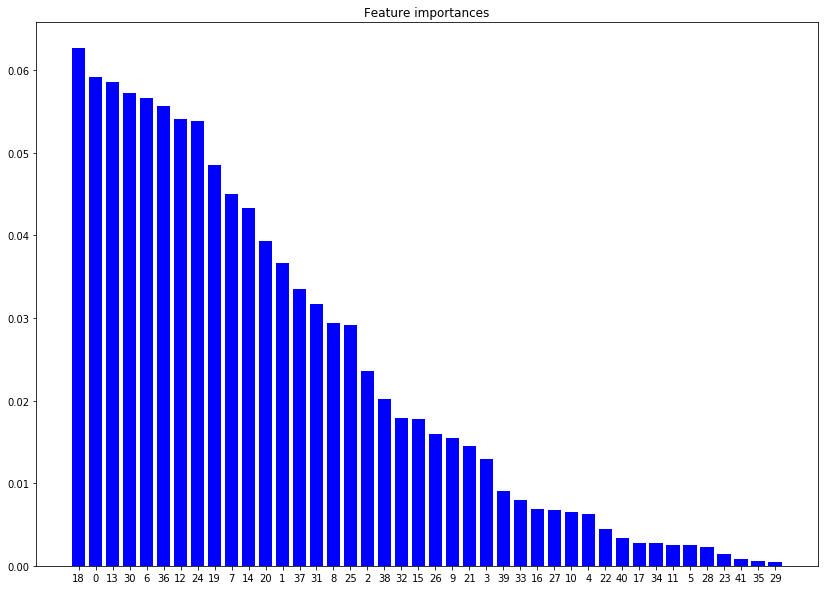

In [45]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importance_of_feautres[indices], color="b", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

Print top 5 feautres:

In [46]:
features = connect_data.columns
for i in range(5):
    print(features[indices[i]])

x.1
b
o
b.22
b.6


## Step 3. Prediction

### Step 3.1 Prediction using Tree classifer

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [48]:
dtc = DecisionTreeClassifier()

In [50]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
print("Accuracy for Random Forest Classifer: {}%".format(accuracy_score(y_test, dtc.predict(X_test))*100))

Accuracy for Random Forest Classifer: 73.10406078847387%


In [77]:
precisions = cross_val_score(dtc, X_train, y_train, cv=10, scoring='precision')
print('Precision = P = True_positive / (True_positive + False_positive): ', np.mean(precisions))

recalls = cross_val_score(dtc, X_train, y_train, cv=5, scoring='recall')
print('Recalls = True_positive / (True_positive + False_negative): ', np.mean(recalls))

C:\Users\Luka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Users\Luka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight

Precision = P = True_positive / (True_positive + False_positive):  0.72378925425


C:\Users\Luka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Users\Luka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight

Recalls = True_positive / (True_positive + False_negative):  0.717587609078


C:\Users\Luka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


### Step 3.2 Prediction using Ensemble classifers

In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=300)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
print("Accuracy for Random Forest Classifer: {}%".format(accuracy_score(y_test, rfc.predict(X_test))*100))

Accuracy for Random Forest Classifer: 81.44767355800069%


In [70]:
ada = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=50)

In [71]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [72]:
print("Accuracy for Ada Boost Classifer: {}%".format(accuracy_score(y_test, ada.predict(X_test))*100))

Accuracy for Ada Boost Classifer: 73.39024029210046%


### Step 3.2.1 Grid Search for the best set of params

In [81]:
from sklearn.grid_search import GridSearchCV
import time

In [79]:
params_grid = {'criterion':['gini', 'entropy'], 'n_estimators':[10, 100, 300, 350, 500]}

In [84]:
start = time.time()
gsCV = GridSearchCV(rfc, param_grid=params_grid, cv=10)
gsCV.fit(X_train, y_train)
end = time.time()
print("Grind search for Random forest classifier took: ", end - start)

Grind search for Random forest classifier took:  899.8626782894135


In [85]:
print(gsCV.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Step 3.2.2 Fine tune params in Random Forest Classifier according to Grind Search

In [87]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
print("Accuracy for Random Forest Classifer: {}%".format(accuracy_score(y_test, rfc.predict(X_test))*100))

Accuracy for Random Forest Classifer: 81.6943800266443%


Tuning those params did improve test accuracy but it was almost unnoticeable. So we go further...

## Step 4. Further tests

### Step 4.1 KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
start_knn = time.time()
print("Accuracy for KNN: {}%".format(accuracy_score(y_test, knn.predict(X_test))*100))
end_knn = time.time()
time_knn = end_knn - start_knn
print("Time for knn: ", time_knn)

Accuracy for KNN: 74.1451620861499%
Time for knn:  24.455848932266235


### Step 4.2 Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
liner_classifer = LogisticRegression()

In [99]:
liner_classifer.fit(X_train, y_train)
start_linea = time.time()
print("Accuracy for Linear Classifer: {}%".format(accuracy_score(y_test, liner_classifer.predict(X_test))*100))
end_linea = time.time()
time_linea = end_linea - start_linea
print("Time for Linear Classifier: ", time_linea)

Accuracy for Linear Classifer: 66.3295011595204%
Time for Linear Classifier:  0.005014181137084961


## Summary:

According to all tests that we have performed, Ensembled models showed the best performance on the test set. In the first place was Random Forest Classifier with 81.7%.
With the Fine tunning we got about 0.5% more than with starting setup of this algorithm. 

Note for simple methods: Linear Classifier (Logistic Regression) is running very fast but accuracy is about 10% lower than KNN. 